In [80]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
plt.style.use("fivethirtyeight")

In [81]:
f = lambda x,y: np.cos(2*x)
yExact = lambda x: 1/2 * np.sin(2*x) + 2
step_size = np.array([np.linspace(0, 2*np.pi, 100),
              np.linspace(0, 2*np.pi, 50),
              np.linspace(0, 2*np.pi, 25),
              np.linspace(0, 2*np.pi, 10)], dtype=object)
y0 = 2.0

In [82]:
def euler(f, x, y0):
    n = np.shape(x)[0]
    # initializing the vector y as an array of zeros
    y = np.zeros(n)
    y[0] = y0
    h = x[1] - x[0]
    for i in range(n-1):
        y[i+1] = y[i] + h*f(x[i],y[i])
    return y

In [83]:
def midpoint(f, x, y0):
    n = np.shape(x)[0]
    # initializing the vector y as an array of zeros
    y = np.zeros(n)
    y[0] = y0
    h = x[1] - x[0]
    for i in range(n-1):
        k1 = f(x[i], y[i])
        k2 = f(x[i] + h, y[i] + k1 * h)
        y[i+1] = y[i] + h * (k1 + k2) / 2
    return y

In [84]:
def ralston(f, x, y0):
    n = np.shape(x)[0]
    y = np.zeros(n)
    y[0] = y0
    h = x[1] - x[0]
    y[1] = y0 + h * f(x[0],y[0])
    for i in range(n-1):
        k1 = f(x[i],y[i])
        k2 = f(x[i] + 3/4 *h,y[i] + 3/4*(k1 * h))
        y[i+1] = y[i] + ((1/3*k1 + 2/3*k2) * h)
    return y

In [85]:
def rk4(f,x,y0):
    n = np.shape(x)[0]
    y = np.zeros(n)
    y[0] = y0
    h = x[1] - x[0]
    y[1] = y0 + h * f(x[0],y[0])
    for i in range(n-1):
        k1 = f(x[i],y[i])
        k2 = f(x[i] + 1/2* h,y[i] + 1/2*(k1 * h))
        k3 = f(x[i] + 1/2* h,y[i] + 1/2*(k2 * h))
        k4 = f(x[i] + 1/2* h,y[i] + 1/2*(k3 * h))
        y[i+1] = y[i] + 1/6 * (k1 + 2*k2 + 2*k3 + k4) * h
    return y

In [86]:
def errEuler(f,x,y0):
    result = norm(euler(f,x,y0) - yExact(x)) / norm(yExact(x)) * 100
    return result
def errMidpoint(f,x,y0):
    result = norm(midpoint(f,x,y0) - yExact(x)) / norm(yExact(x)) * 100
    return result
def errRalston(f,x,y0):
    result = norm(ralston(f,x,y0) - yExact(x)) / norm(yExact(x)) * 100
    return result
def errRk4(f,x,y0):
    result = norm(rk4(f,x,y0) - yExact(x)) / norm(yExact(x)) * 100
    return result

In [87]:
eulerArr=np.array([errEuler(f, step_size[0], y0), errEuler(f, step_size[1], y0), errEuler(f, step_size[2],y0), errEuler(f, step_size[3],y0)])
midpointArr=np.array([errMidpoint(f, step_size[0], y0), errMidpoint(f,step_size[1],y0), errMidpoint(f,step_size[2],y0), errMidpoint(f,step_size[3],y0)])
ralstonArr=np.array([errRalston(f, step_size[0],y0), errRalston(f,step_size[1],y0), errRalston(f, step_size[2],y0), errRalston(f,step_size[3],y0)])
rk4Arr=np.array([errRk4(f,step_size[0],y0), errRk4(f,step_size[1],y0), errRk4(f,step_size[2],y0), errRk4(f,step_size[3],y0)])                   

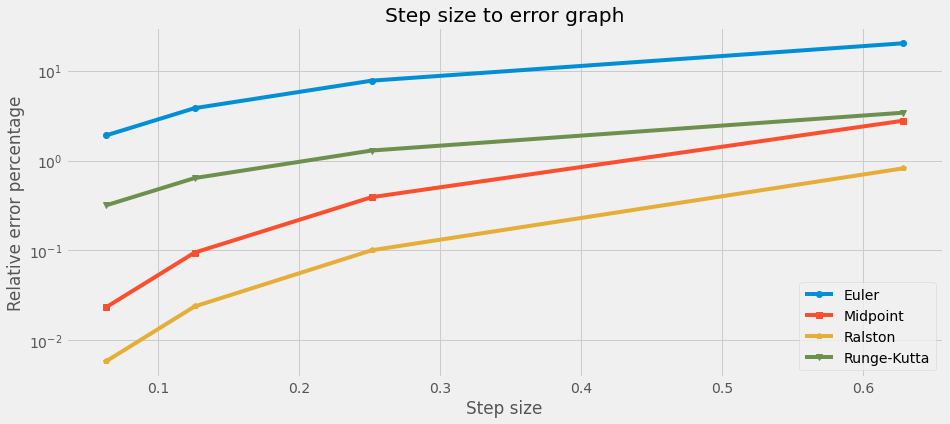

In [88]:
step_size = np.array([2 * np.pi/100, 2*np.pi/50, 2 * np.pi/25, 2*np.pi/10])
fig = plt.figure(1, figsize = (14,6)); plt.clf();
ax = fig.add_subplot(1,1,1)
ax.set_yscale("log")
ax.plot(step_size, eulerArr, "-o", label = "Euler")
ax.plot(step_size, midpointArr, "-s", label = "Midpoint")
ax.plot(step_size, ralstonArr, "-p", label = "Ralston")
ax.plot(step_size, rk4Arr, "-v", label = "Runge-Kutta")
ax.set_ylabel("Relative error percentage")
ax.set_xlabel("Step size")
ax.set_title("Step size to error graph")
ax.legend()